In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()
X = data.data
y = data.target

col_names = data.feature_names

In [3]:
# Standardize X

# mean = X.mean(axis=0)
# std = X.std(axis=0)
# X = (X-mean)/std

X[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [4]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [5]:
# Storing the target in a temperory variable to avoid the loss of original data.
temp = y

for i in range(len(y)):
    if (y[i] >= 5 and y[i] < 21):
        y[i] = 0 # low
    elif (y[i] >= 21 and y[i] < 36):
        y[i] = 1 # mid
    elif (y[i] >= 26 and y[i] <= 50):
        y[i] = 2 # high

y = y.astype(int)

print(min(y), max(y))

0 2


### Step 1: Split the dataset into 70% training set and 30% test set.

### Step 2: Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data.

### Step 3: Report the tree depth, number of leaves, feature importance, train score, and test score of the tree. Let the tree depth be Td.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, 
                                                    test_size=0.30)

dt = DecisionTreeClassifier().fit(X_train,y_train)
predict = dt.predict(X_test)

predict_train = dt.predict(X_train)

Td = dt.get_depth()
print("Depth of the classifier: ", Td)
print("Number of leaves in the classifier: ", dt.get_n_leaves())
print("Feature importance for the classifier: ", 
      str(dt.tree_.compute_feature_importances(normalize=False)))
print("Train score for the classifier: ", 
      accuracy_score(y_train, predict_train))
print("Test score for the classifier: ", accuracy_score(y_test, predict))

# Visualizing the decision tree using Graphviz
gviz = export_graphviz(dt,
                out_file = None,
                feature_names = col_names,
                class_names = ['low', 'mid', 'high'],
                filled=True)

Depth of the classifier:  14
Number of leaves in the classifier:  40
Feature importance for the classifier:  [0.04879606 0.00282486 0.0083293  0.         0.01489359 0.14811797
 0.04314682 0.02850423 0.00338983 0.01826397 0.02997451 0.01031436
 0.21462457]
Train score for the classifier:  1.0
Test score for the classifier:  0.756578947368421


### Step 4: Show the visual output of the decision tree.

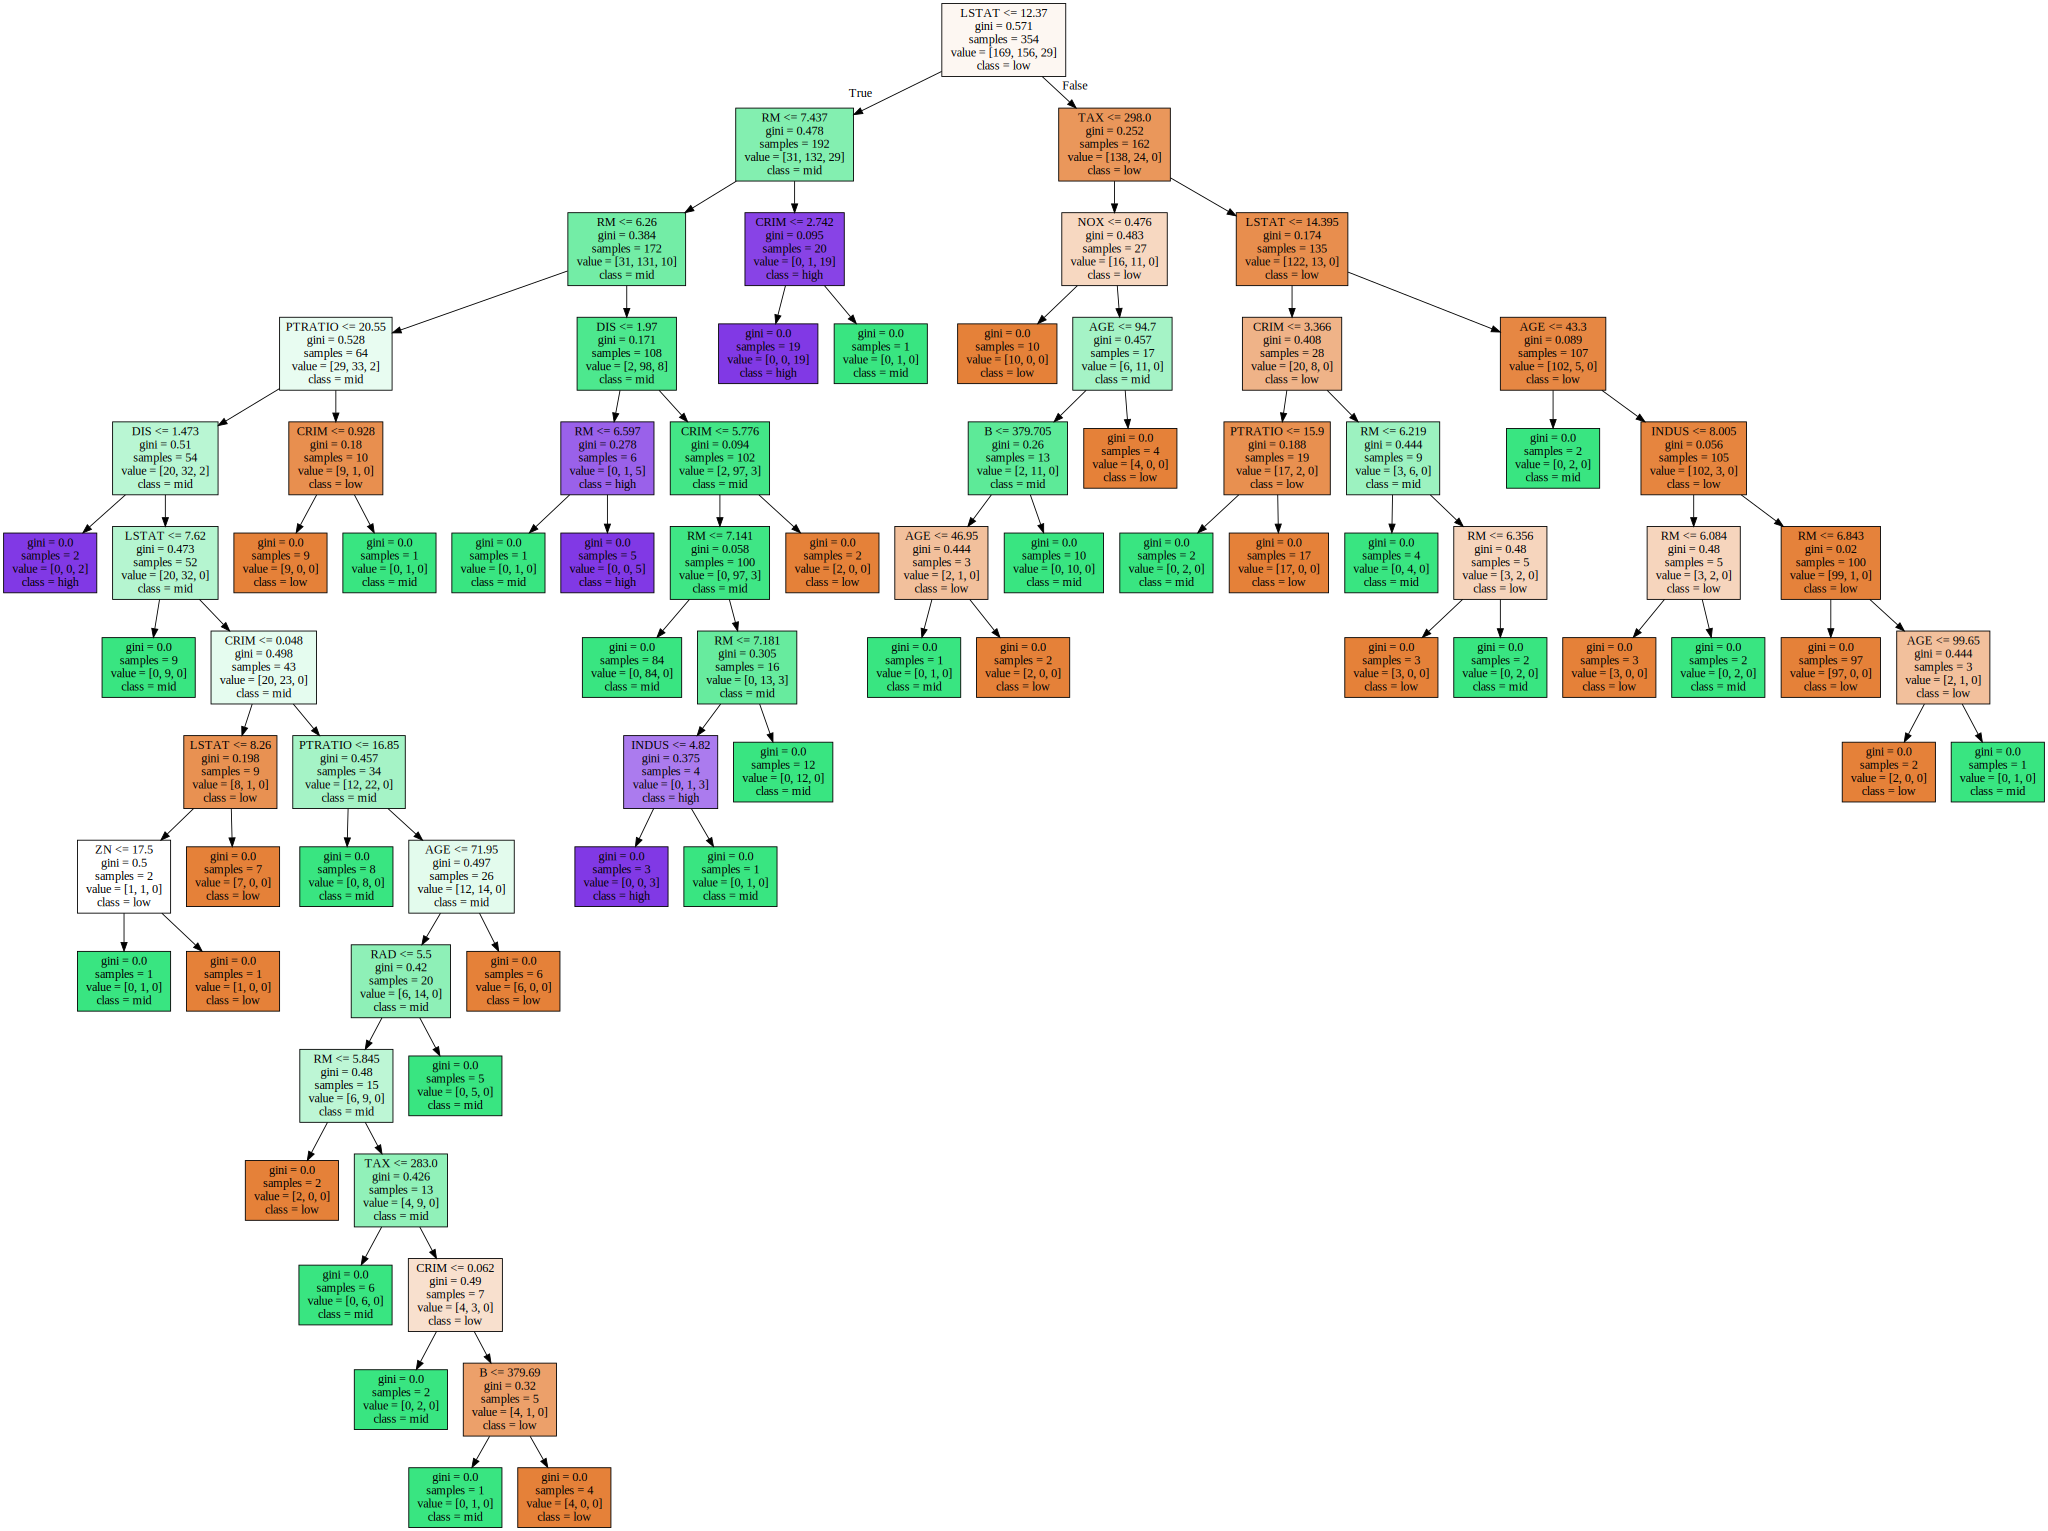

In [7]:
import graphviz

graph = graphviz.Source(gviz)
display(graph)
graph.render("./DecisionTreeViz/depth_max",view=True)
f = open("./dot_files/all.dot","w+")
f.write(gviz)
f.close()

### Step 5: Next, Generate (Td-1) decision trees on the same training set using fixed tree depths {1, 2, ...(T d − 1)}. The tree depth can be set using max=d, where d is the depth of the tree.

### Step 6: For each of the (Td-1) trees report, tree depth, number of leaves, feature importance, train score, and test score of the tree.

In [10]:
max_details = [float("-inf"),0]
max_viz = graph
for i in range(1, Td):
    clf = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    predict = clf.predict(X_test)
    
    predict_train = clf.predict(X_train)
    
    print("Depth of the classifier: ", clf.get_depth())
    print("Number of leaves in the classifier: ", clf.get_n_leaves())
    acc_train = accuracy_score(y_train, predict_train)
    print("Train score for the classifier: ", acc_train)
    acc = accuracy_score(y_test, predict)
    print("\033[1mTest score for the classifier: ", acc)
    print("\033[0mFeature importance for the classifier: ", 
          str(clf.tree_.compute_feature_importances(normalize=False)))
    print("==============================================", 
          "=============================")
        
    
    viz = export_graphviz(clf,
                         out_file=None,
                          feature_names = col_names,
                         class_names=['low', 'mid', 'high'],
                         filled=True)
    
    graph = graphviz.Source(viz)
    graph.render("./DecisionTreeViz/depth_"+str(i), view=True)
    f = open("./dot_files/depth_"+str(i)+".dot", "w+")
    f.write(viz)
    f.close()
    
    
    if max_details[0] < acc:
        max_details[0] = acc
        max_details[1] = i
        max_viz = graph

Depth of the classifier:  1
Number of leaves in the classifier:  2
Train score for the classifier:  0.7627118644067796
Test score for the classifier:  0.6907894736842105
Feature importance for the classifier:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.19617025]
Depth of the classifier:  2
Number of leaves in the classifier:  4
Train score for the classifier:  0.8135593220338984
Test score for the classifier:  0.743421052631579
Feature importance for the classifier:  [0.         0.         0.         0.         0.         0.06753233
 0.         0.         0.         0.01230383 0.         0.
 0.19617025]
Depth of the classifier:  3
Number of leaves in the classifier:  8
Train score for the classifier:  0.8305084745762712
Test score for the classifier:  0.756578947368421
Feature importance for the classifier:  [0.00536723 0.         0.         0.         0.01489359 0.10660703
 0.         0.         0.         0

### Step 7: Show the visual output of the decision tree with highest test score from the (Td-1) trees.


Depth of the maximum accuracy decision tree:  12
The maximum accuracy achieved is  0.7697368421052632
The decision tree is 


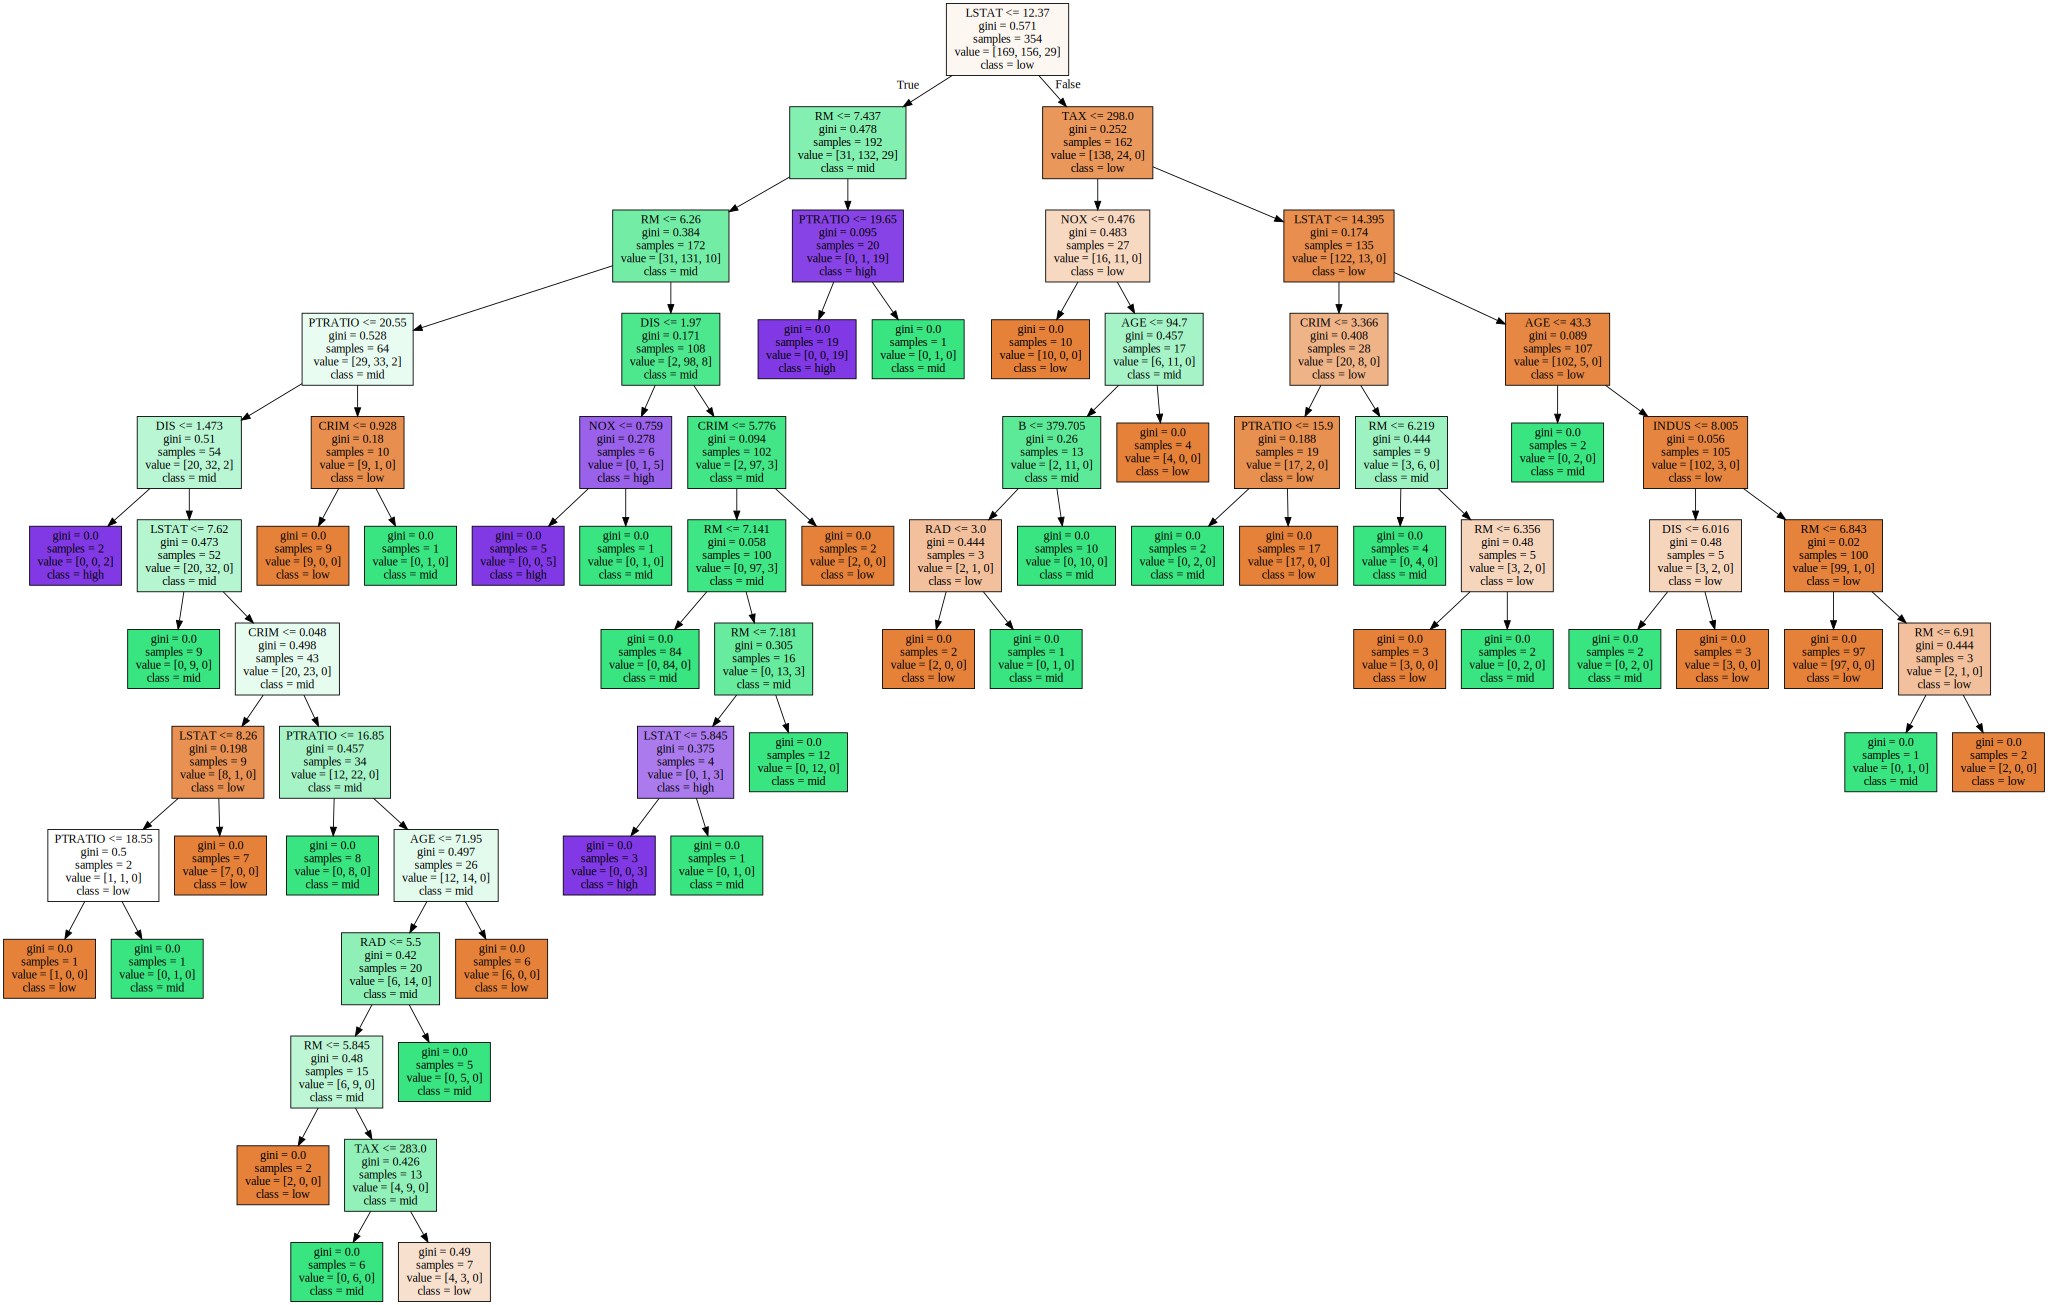

In [11]:
print("Depth of the maximum accuracy decision tree: ", max_details[1])
print("The maximum accuracy achieved is ", max_details[0])
print("The decision tree is ")
display(max_viz)